In [32]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [33]:
# Load the real news dataset
real_news_df = pd.read_csv('abcnews-date-text.csv')
real_news_df = real_news_df.dropna()

# Load the fake news datasets
fake_news_df1 = pd.read_csv('politifact_fake.csv')
fake_news_df2 = pd.read_csv('gossipcop_fake.csv')
fake_news_df = pd.concat([fake_news_df1, fake_news_df2])
fake_news_df = fake_news_df.dropna()

In [34]:
# check the number of rows and columns in each dataset
print('Real news dataset shape:', real_news_df.shape)
print('Fake news dataset shape:', fake_news_df.shape)


Real news dataset shape: (1468753, 2)
Fake news dataset shape: (5287, 4)


In [35]:
# Function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convert text to lowercase and tokenize words
    words = text.lower().split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [36]:
# Clean the real news headlines
real_news_df['cleaned_headline'] = real_news_df['headline_text'].apply(clean_text)

# Clean the fake news headlines
fake_news_df['cleaned_title'] = fake_news_df['title'].apply(clean_text)


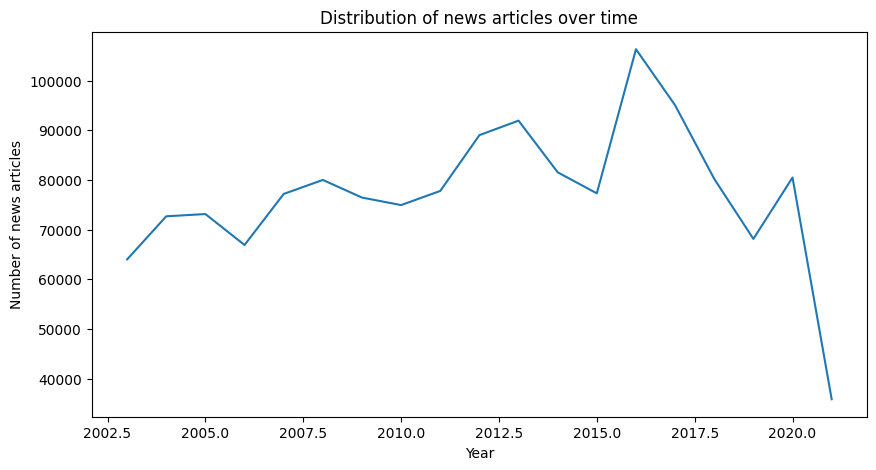

In [25]:
# plot the distribution of news articles over time
real_news_df['publish_date'] = pd.to_datetime(real_news_df['publish_date'], format='%Y%m%d')
real_news_df['year'] = real_news_df['publish_date'].dt.year
real_news_df['month'] = real_news_df['publish_date'].dt.month
year_count = real_news_df.groupby('year')['headline_text'].count().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='headline_text', data=year_count)
plt.title('Distribution of news articles over time')
plt.xlabel('Year')
plt.ylabel('Number of news articles')
plt.show()

In [37]:
# Top 20 most common words in real news headlines
real_news_words = []
for headline in real_news_df['cleaned_headline']:
    real_news_words += headline.split()
real_news_word_counts = pd.Series(real_news_words).value_counts()
real_news_word_counts = real_news_word_counts[real_news_word_counts.index != '']
real_news_word_counts = real_news_word_counts[:20]

In [38]:
# Top 20 most common words in fake news headlines
fake_news_words = []
for title in fake_news_df['cleaned_title']:
    fake_news_words += title.split()
fake_news_word_counts = pd.Series(fake_news_words).value_counts()
fake_news_word_counts = fake_news_word_counts[fake_news_word_counts.index != '']
fake_news_word_counts = fake_news_word_counts[:20]

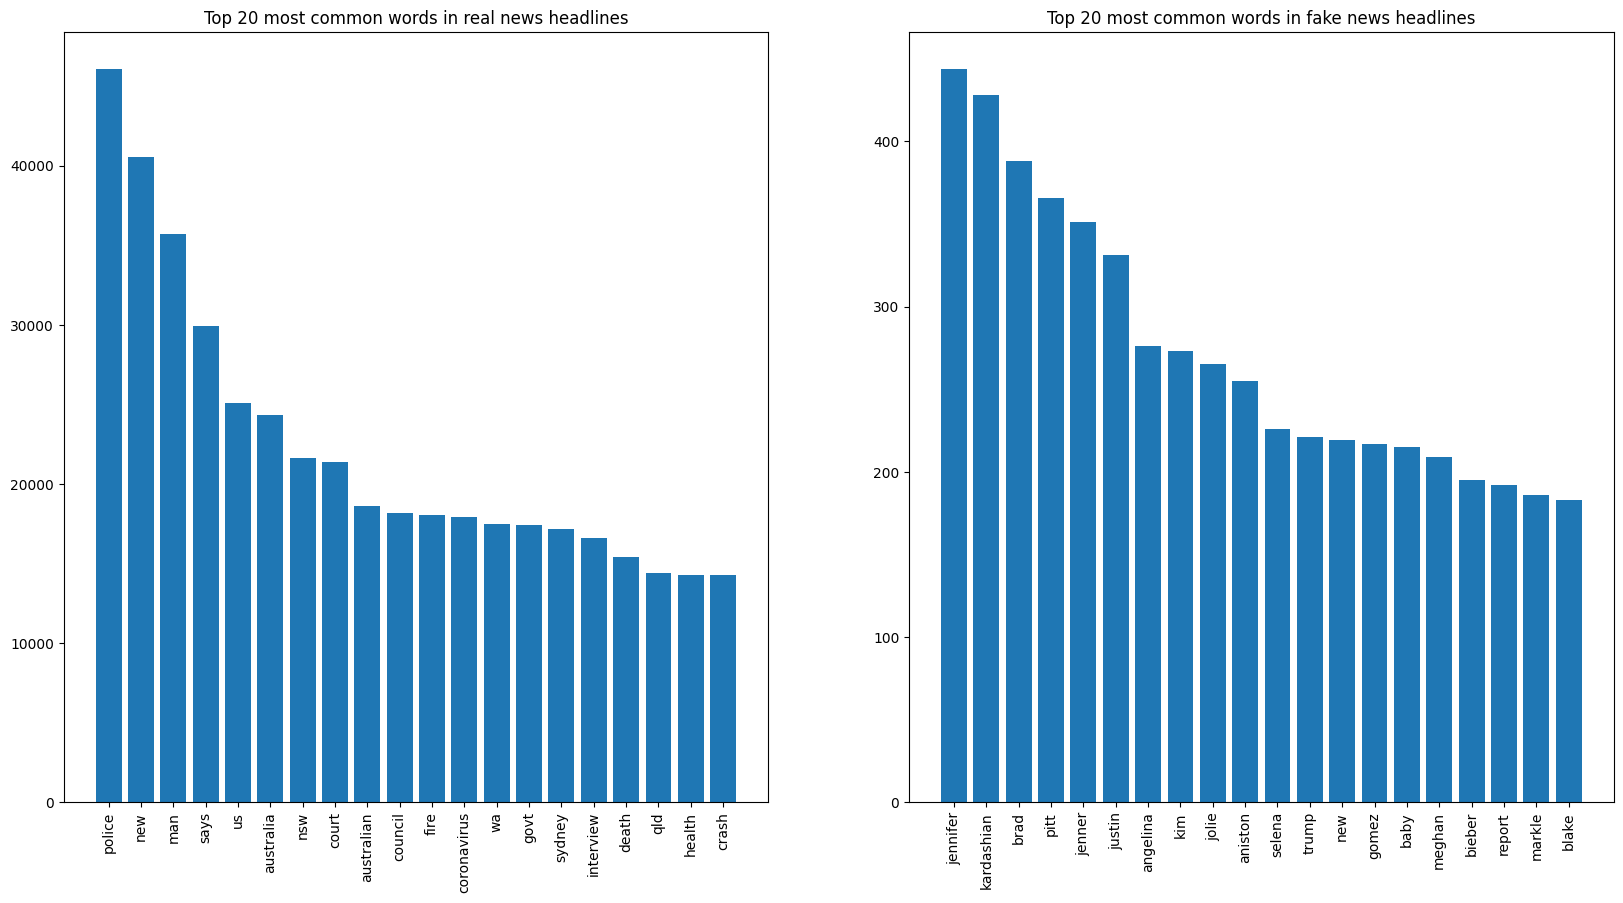

In [39]:
# Plot the word frequency distributions
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.bar(real_news_word_counts.index, real_news_word_counts.values)
plt.title('Top 20 most common words in real news headlines')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(fake_news_word_counts.index, fake_news_word_counts.values)
plt.title('Top 20 most common words in fake news headlines')
plt.xticks(rotation=90)

plt.show()